In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

What is the subject's age? 
 1.P28
2.E16.5
3.E18.5
2


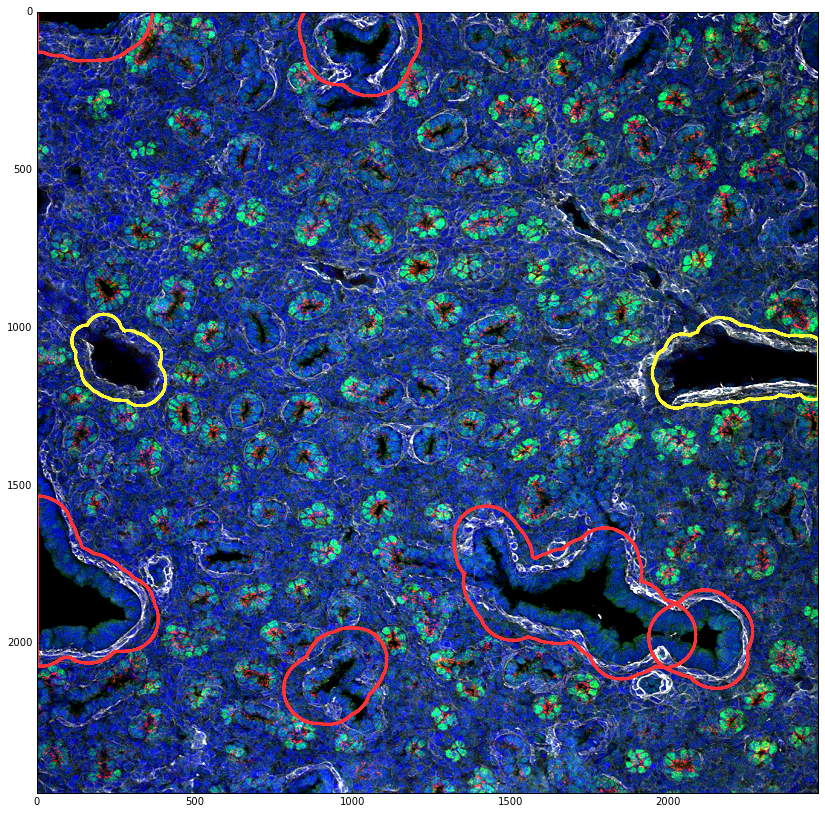

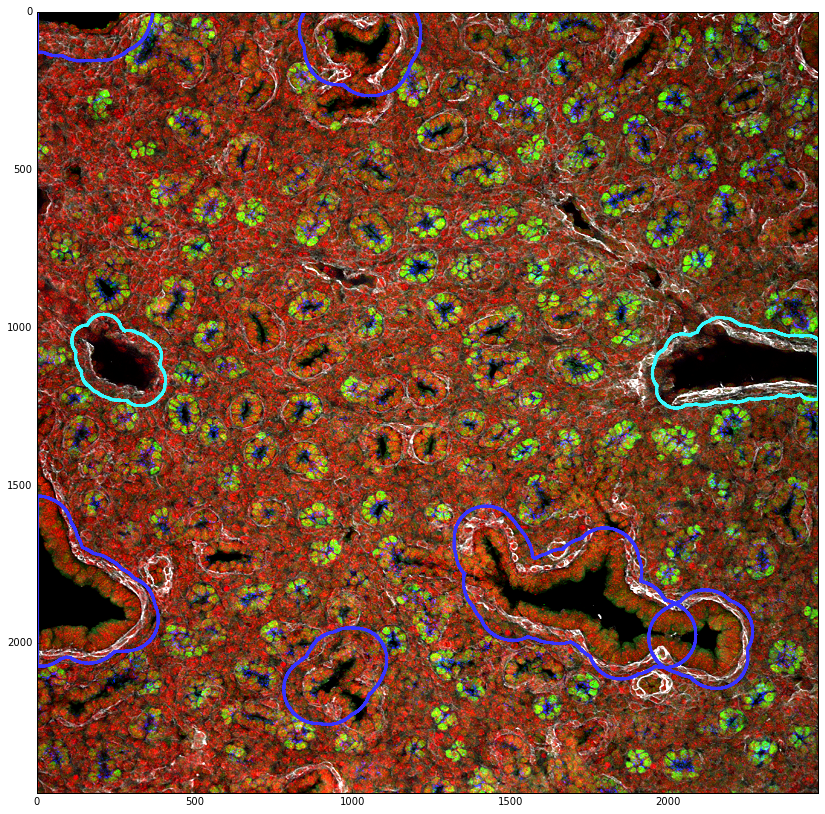

In [52]:
Age=input("What is the subject's age? \n 1.P28\n2.E16.5\n3.E18.5\n")
#Structure=input("What structure are you looking for \n 1. Veins\n2. Brionchioles\n")
Structure=2


filename=str("C:/Users/PABLO ORTIZ/ImageWeek3.png")
orim=cv2.imread(filename)

im = orim
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)


if Age!=2:
    for i in range(0,3):
        im = cv2.GaussianBlur(im, (33,33),0)    
    
orim = cv2.cvtColor(orim, cv2.COLOR_BGR2RGB)
imgray = cv2.cvtColor(im,cv2.COLOR_RGB2GRAY)



# find contours
finalcontours = []
thresh = cv2.inRange(im, np.array([0,0,0]), np.array([25,25,25]))
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
for i in range(0, len(contours)):
    a = cv2.contourArea(contours[i])
    if (a>3000 and a<10000000):
        finalcontours.append(contours[i])

im=orim
orim=cv2.imread(filename)
orim = cv2.cvtColor(orim, cv2.COLOR_BGR2RGB)

for ia in range(0, len(finalcontours)):
        a = cv2.contourArea(finalcontours[ia])
        if a>375000:
            T=75
        elif a>200000:
            T= int(a*0.0002)
        else:
            T=50
        mask = np.zeros(imgray.shape,np.uint8)
        temp2 = cv2.drawContours(mask,finalcontours,ia,(100,100,100),thickness=T, lineType=2,maxLevel = 0)

        cnt=finalcontours[ia]
        cv2.drawContours(mask,[cnt],0,0,-1)#delete the contour area from the mask

        mean_val = cv2.mean(orim,mask = mask)
       

        #x,y,w,h = cv2.boundingRect(cnt)
        #font = cv2.FONT_HERSHEY_SIMPLEX
        #cv2.putText(im,str(ia),(x,y), font, 2,(255,255,255),2)
        
        Structure=2#################HAS TO EVENTUALLY CHANGE
        
        if Structure==2:
            T2=200 #Hardcode for the thickness that captures the white and blue in bronchioles
            mask = np.zeros(imgray.shape,np.uint8)
            temp2 = cv2.drawContours(mask,finalcontours,ia,(100,100,100),thickness=T2, lineType=2,maxLevel = 0)
            cv2.drawContours(mask,[cnt],0,(250,220,55),-1)#insert the contour area from the mask
            contours2, hierarchy2 = cv2.findContours(mask,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

            if (Age==1 and mean_val[0]>10 and mean_val[1]>30 and mean_val[2]>30 and mean_val[0]<50) or \
                (Age==2 and (mean_val[2]-10>mean_val[0] and mean_val[1]>mean_val[0])  and mean_val[0]<35) or \
                (Age==3 and mean_val[0]<20 and mean_val[1]>20):
                temp2 = cv2.drawContours(im,contours2,0,(255,50,55),thickness=10, lineType=1,maxLevel=0)  
            
        Structure=1########################HAS TO EVENTUALLY CHANGE
        if Structure==1:
            T1=100 #Hardcode for the thickness that captures the white in veins
            mask = np.zeros(imgray.shape,np.uint8)
            temp2 = cv2.drawContours(mask,finalcontours,ia,(100,100,100),thickness=T1, lineType=2,maxLevel = 0)
            cv2.drawContours(mask,[cnt],0,(250,220,55),-1)#insert the contour area from the mask
            contours2, hierarchy2 = cv2.findContours(mask,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

            if  (Age==2 and Structure==1 and (np.mean(mean_val)>40 and not ((mean_val[2]-10>mean_val[0] and mean_val[1]>mean_val[0])  and mean_val[0]<35))) or \
                (Age==3 and Structure==1 and (np.mean(mean_val)>40 or min([mean_val[0],mean_val[1],mean_val[2]])>45)):
                temp2 = cv2.drawContours(im,contours2,0,(255,250,55),thickness=10, lineType=1,maxLevel=0)


        #cv2.putText(im,'Bronchioles',(0,200), font, 5,(255,50,55),20)
        #cv2.putText(im,'Veins',(0,350), font, 5,(255,250,55),20)
        #print(ia, mean_val, a, T)

plt.figure(figsize=(48, 14))
plt.imshow(im)
plt.figure(figsize=(48, 14))
orim=cv2.imread(filename)
orim = cv2.cvtColor(orim, cv2.COLOR_BGR2RGB)
#plt.imshow(orim)
im = cv2.cvtColor(im, cv2.COLOR_RGB2BGR)
#cv2.imwrite("Segmented" + filename.split("/")[-1],im)